The purpose of this demonstration is to acsess the functionality of MadGraph using python only. This involves creating and calling a script file that interacts with madgrpah directly. The output is the P values of the simulation nievely read into a pandas dataframe where, in concept, they can be minipulated directly with pythion only machinary. (This means statistics, histograms, etc, directly from python!)

In [54]:
import subprocess
import time
from IPython.display import display, clear_output
import pandas as pd
import matplotlib.pyplot as plt


mg5_path = '/home/leo/MadStats/MadGraph/mg5amcnlo/bin/mg5_aMC'
script_path = '/home/leo/MadStats/MadGraph/mg5amcnlo/test_script.MG5'

# Start the MadGraph process
process = subprocess.Popen([mg5_path, script_path], stdout=subprocess.PIPE, stderr=subprocess.PIPE)

try:
    while process.poll() is None:
        time.sleep(1)  # Add a small delay to reduce CPU usage
finally:
    process.stdout.close()
    process.stderr.close()
    process.wait()  # Ensure the process is fully terminated
    display("Process cleaned up.")

'Process cleaned up.'

In [55]:
!gunzip /home/leo/MadStats/Notebooks/SCRIPT/Events/run_01/tag_1_pythia8_events.hepmc.gz
!grep "P " /home/leo/MadStats/Notebooks/SCRIPT/Events/run_01/tag_1_pythia8_events.hepmc > /home/leo/MadStats/Notebooks/Ps_auto.dat

In [56]:
df = pd.read_csv("Ps_auto.dat", delimiter=' ')

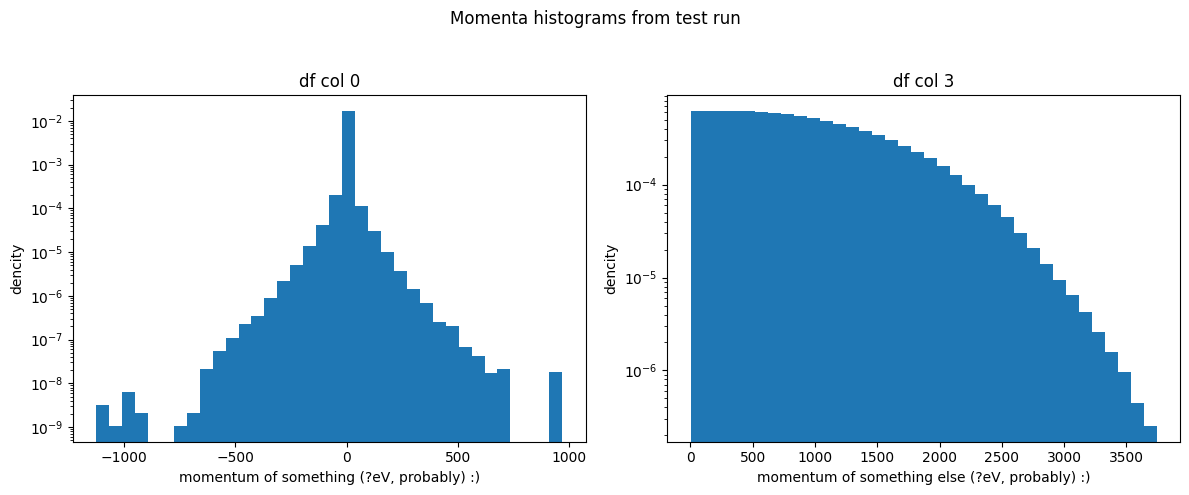

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  

# First hist; df[0]
ax1.hist(df['0'], bins=36, density=True)
ax1.set_title('df col 0')
ax1.set_xlabel('momentum of something (?eV, probably) :)')
ax1.set_ylabel('dencity')
ax1.set_yscale('log')

# Second hist; df[3]
ax2.hist(df['3'], bins=36, density=True)
ax2.set_title('df col 3')
ax2.set_xlabel('momentum of something else (?eV, probably) :)')
ax2.set_ylabel('dencity')
ax2.set_yscale('log')

# Set the overall title
fig.suptitle('Momenta histograms from test run')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Data file perduced via:
1) cd /home/leo/MadStats/Notebooks/SCRIPT/Events/run_01
2) gunzip tag_1_pythia8_events.hepmc.gz
3) grep "P " tag_1_pythia8_events.hepmc > Ps.dat